<a href="https://colab.research.google.com/github/ILMNX/Pattern-recognition/blob/main/ImageEnhancementSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python scikit-image matplotlib numpy

In [ ]:
!pip install PyWavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 28.7 MB/s eta 0:00:00


#Library

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.restoration import denoise_wavelet
from skimage.exposure import equalize_adapthist
from sklearn.cluster import KMeans

#Dataset

In [ ]:
def display_images(original, processed, title_original="Original", title_processed="Processed"):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title(title_original)

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(processed, cv2.COLOR_BGR2RGB))
    plt.title(title_processed)
    plt.show()

image = cv2.imread('sample_data/wolf.jpg')

# 1. Filtering dengan Operator Morfologi (Dilasi & Erosi)

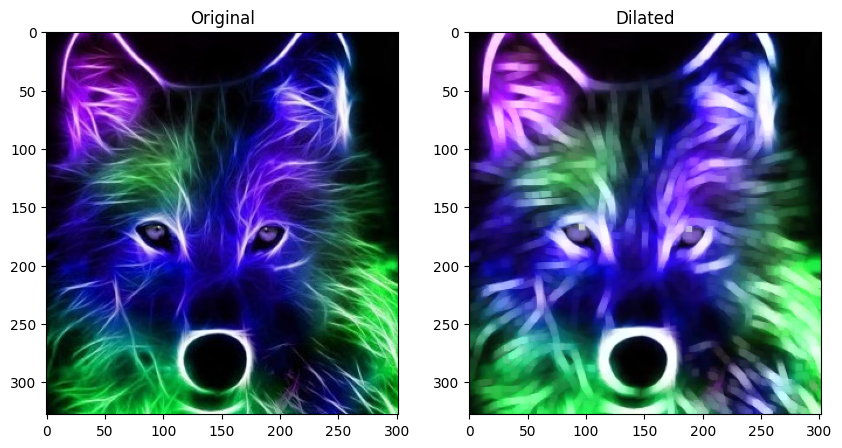

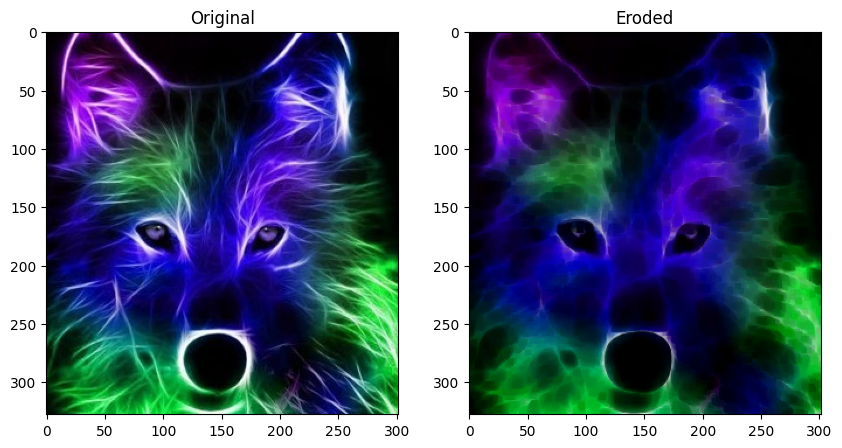

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
dilated = cv2.dilate(image, kernel, iterations=1)
eroded = cv2.erode(image, kernel, iterations=1)
display_images(image, dilated, "Original", "Dilated")
display_images(image, eroded, "Original", "Eroded")

# 2. Histogram Equalization (untuk grayscale)

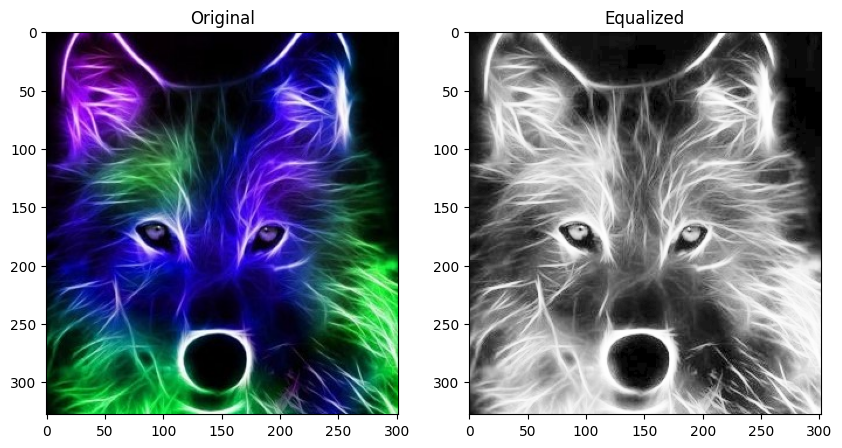

In [ ]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
equalized = cv2.equalizeHist(gray_image)
display_images(image, cv2.cvtColor(equalized, cv2.COLOR_GRAY2BGR), "Original", "Equalized")

# 3. Filter Wiener (menggunakan denoise_wavelet)

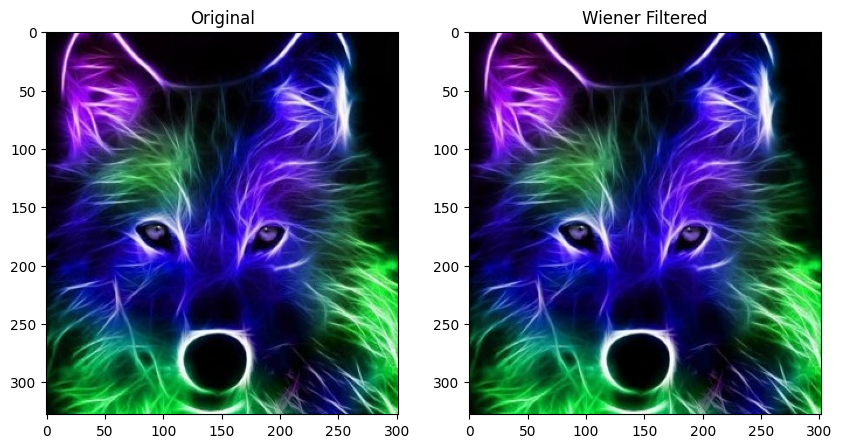

In [ ]:
wiener_filtered = denoise_wavelet(image, channel_axis=-1)
display_images(image, (wiener_filtered * 255).astype(np.uint8), "Original", "Wiener Filtered")

# 4. Penyesuaian Kontras Linear

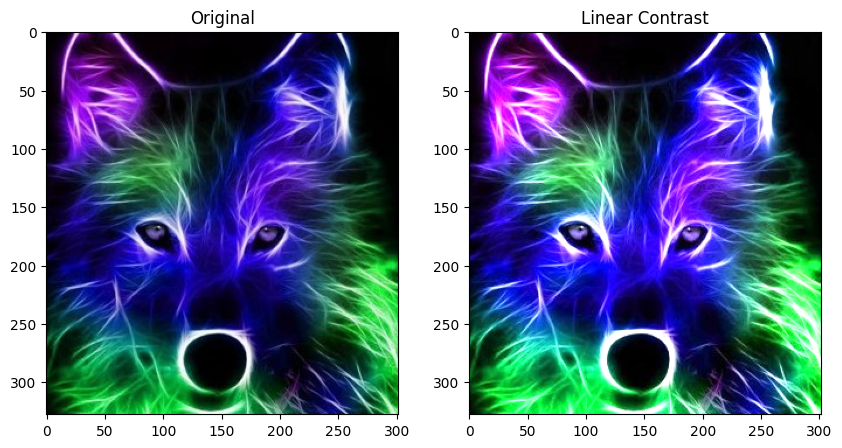

In [ ]:
alpha = 1.5  # Kontras kontrol
beta = 0     # Brightness kontrol
linear_contrast = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
display_images(image, linear_contrast, "Original", "Linear Contrast")

# 5. Median Filtering

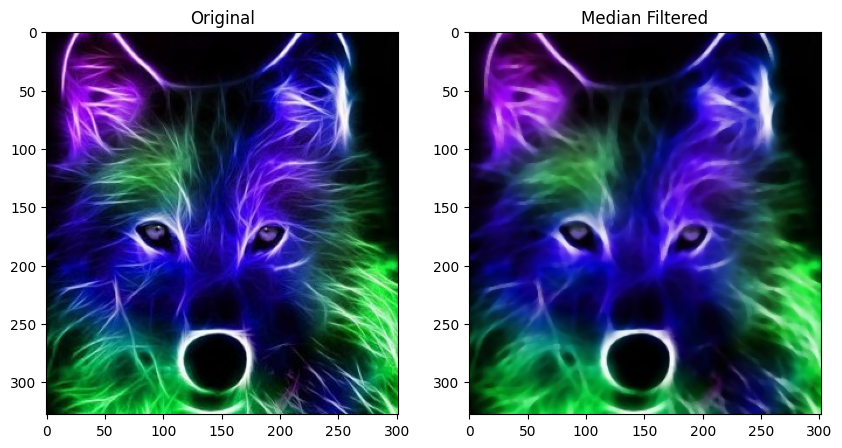

In [ ]:
median_filtered = cv2.medianBlur(image, 5)
display_images(image, median_filtered, "Original", "Median Filtered")

# 6. Unsharp Mask Filtering

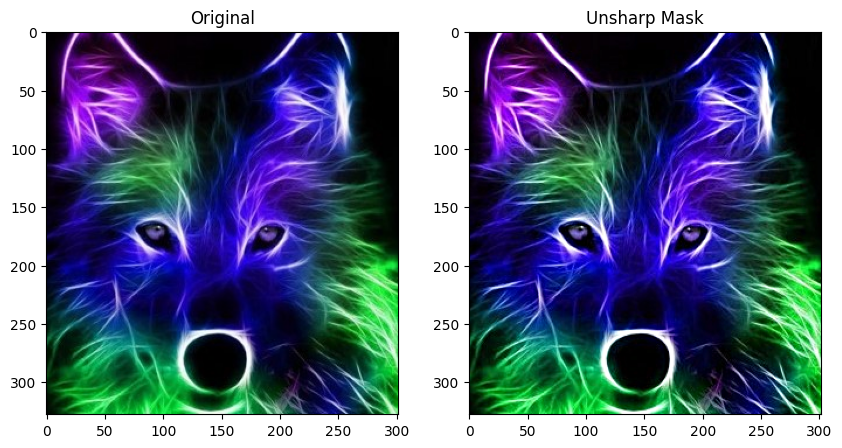

In [ ]:
gaussian_blur = cv2.GaussianBlur(image, (9, 9), 10.0)
unsharp_image = cv2.addWeighted(image, 1.5, gaussian_blur, -0.5, 0)
display_images(image, unsharp_image, "Original", "Unsharp Mask")

# 7. CLAHE (untuk grayscale)

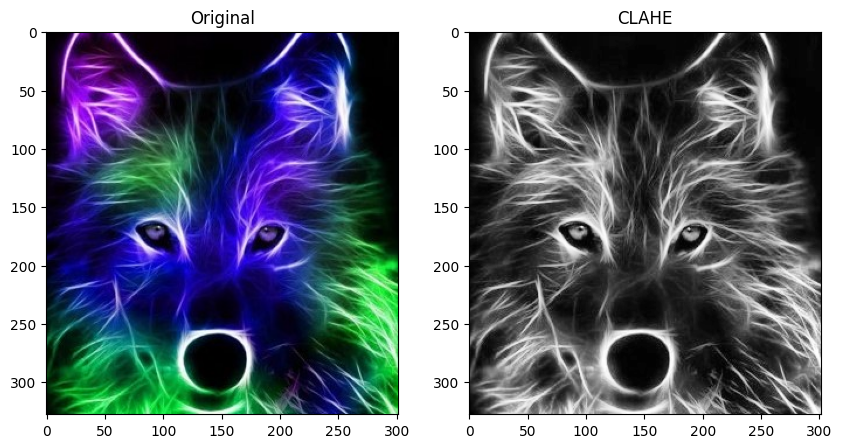

In [ ]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_image = clahe.apply(gray_image)
display_images(image, cv2.cvtColor(clahe_image, cv2.COLOR_GRAY2BGR), "Original", "CLAHE")

# 8. Decorrelation Stretch (dari skimage)

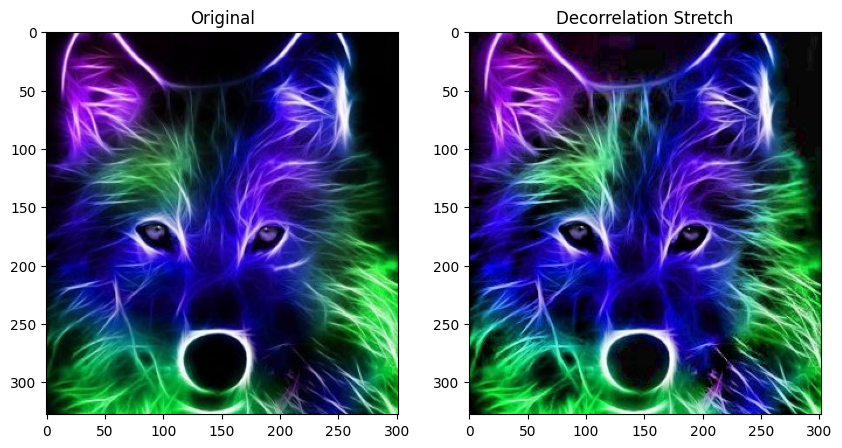

In [ ]:
decorrelated_image = equalize_adapthist(image, clip_limit=0.03)
display_images(image, (decorrelated_image * 255).astype(np.uint8), "Original", "Decorrelation Stretch")


# 9. Segmentasi K-Means

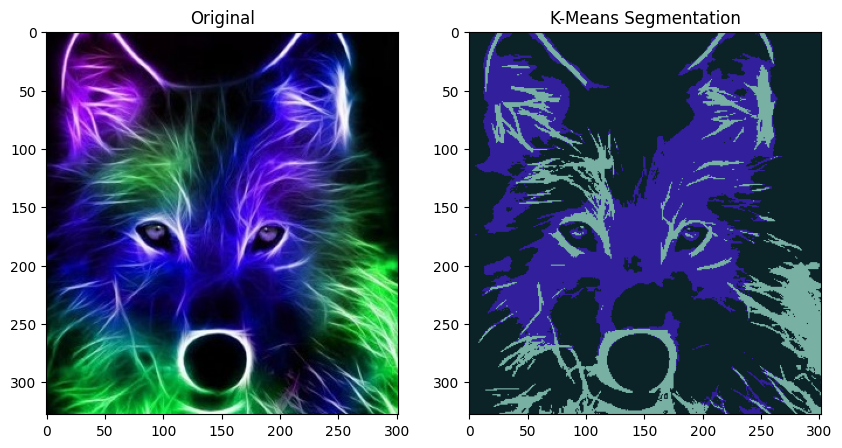

In [ ]:
pixel_values = image.reshape((-1, 3))
kmeans = KMeans(n_clusters=3)
kmeans.fit(pixel_values)
segmented_image = kmeans.cluster_centers_[kmeans.labels_]
segmented_image = segmented_image.reshape(image.shape).astype(np.uint8)
display_images(image, segmented_image, "Original", "K-Means Segmentation")

# 10. Segmentasi Thresholding

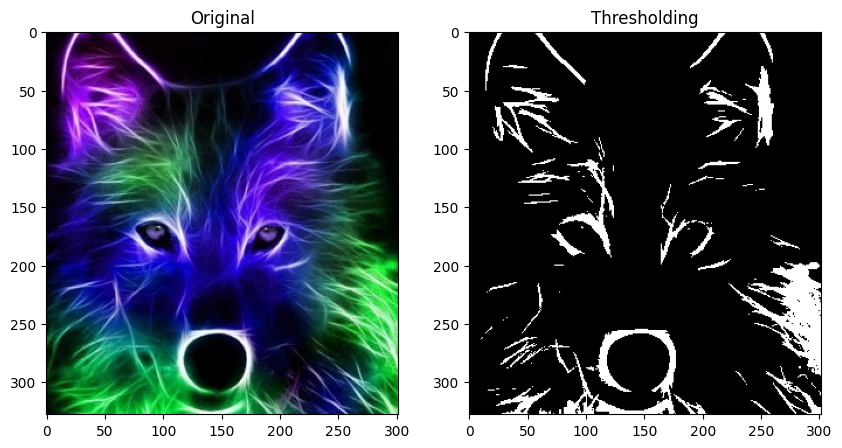

In [ ]:
_, thresh = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
display_images(image, cv2.cvtColor(thresh, cv2.COLOR_GRAY2BGR), "Original", "Thresholding")


# 11. Segmentasi Contour Detection

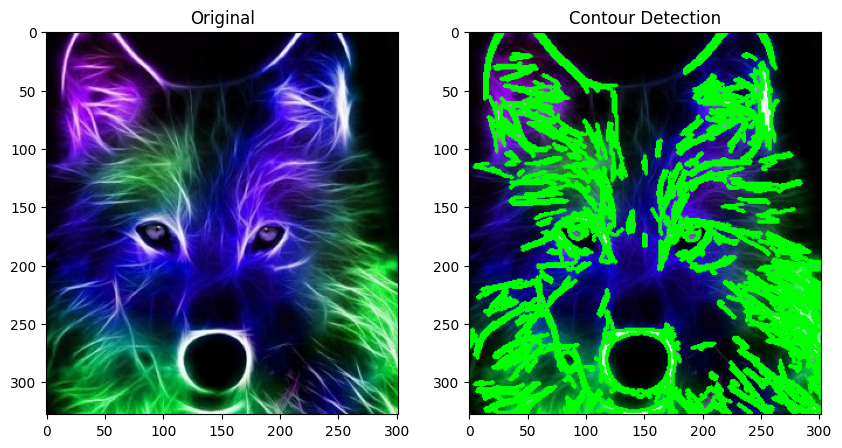

In [ ]:
edges = cv2.Canny(gray_image, 100, 200)
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contour_image = cv2.drawContours(image.copy(), contours, -1, (0, 255, 0), 2)
display_images(image, contour_image, "Original", "Contour Detection")

# 12. Segmentasi Color Masking


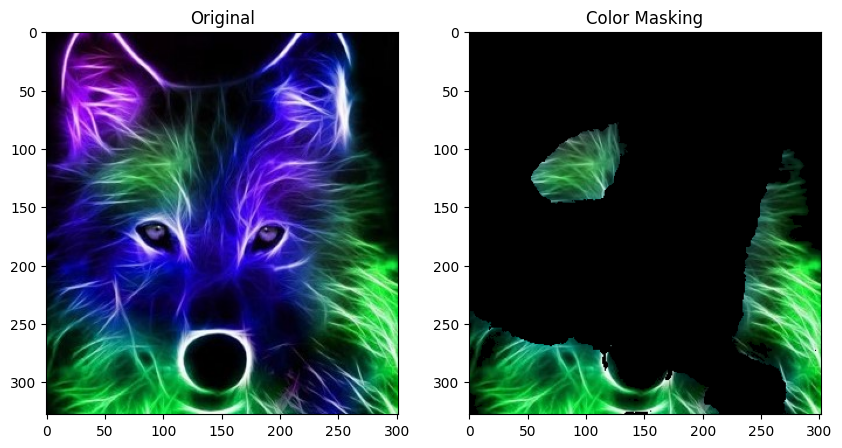

In [ ]:
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
lower_bound = (36, 25, 25)
upper_bound = (86, 255, 255)
mask = cv2.inRange(hsv_image, lower_bound, upper_bound)
masked_image = cv2.bitwise_and(image, image, mask=mask)
display_images(image, masked_image, "Original", "Color Masking")
